# geolocation

- formulation of a solver.

- statistical simulations in order to determine sources of uncertainty

---

## formulation

<img src='schematic.jpeg' alt='Drawing' align='right' style='width: 300px;'/>

We want to find the float horizontal position $\underline{x}=(x,y)$ of an underwater float 
given a number of **known variables**:
- $\underline{x}_s^i$ : source surface float horizontal position
- $t_e^i$ : time of emission for source $i$
- $\tilde{t}_r^i$ : time of reception of the signal emitted by source $i$ by the underwater float
- $\epsilon_i$ : signal detection, $\epsilon_i=1$ (detection) or $1$ (no detection)
- $z$ : underwater float depth(perfect knowledge), not used for now

'Perfect' knowledge is assumed for known variables wich amounts to say potential errors on there
estimates may be neglected.

**Unknown variables** are:
- $\underline{x}=(x,y)$ : underwater float position
- $\delta t$ : underwater float clock offset, $\delta t = \tilde{t}_r^i - t_r^i$, where 
$t_r^i$ is the true time of reception
- $\delta \underline{x}^i$ : vector difference between source $i$ transducer position and surface float position, $\delta \underline{x}^i = \underline{x}_t^i - \underline{x}_s^i$
- $\delta c (\underline{x},\underline{x}_t^i)$ : difference between equivalent celerity defined as 
$c(\underline{x},\underline{x}_t^i) = ||\underline{x} - \underline{x}_t^i ||/(t_r^i - t_e^i)$ and its background (a priori) estimate $c_b$, $\delta c (\underline{x},\underline{x}_t^i) = c(\underline{x},\underline{x}_t^i) - c_b$.

A priori standard deviations for $\underline{x}$, $\delta t$, $\delta \underline{x}^i$, $\delta c (\underline{x},\underline{x}_t^i)$ are
assumed to be known and given by: $e_x$, $e_{\delta t}$, $e_{\delta x}$, $e_{\delta c}$.

Background (a priori) estimates for $\underline{x}$, $\delta t$, $\delta \underline{x}^i$, $\delta c (\underline{x},\underline{x}_t^i)$ may eventually be provided. We assume all are 0 for now except
for the float position $\underline{x}_b=(x=1km, y=0km)$.


We impose **hard contraints** for each source-float acoustic travel:

$$
\begin{align*}
||\underline{x} - \underline{x}_s^i - \delta \underline{x}^i || = \big (c_b + \delta c(\underline{x},\underline{x}_t^i) \big ) \times (\tilde{t}_r^i + \delta t - t_e^i),
\end{align*}
$$

The estimate of the underwater float position $\underline{\hat{x}}$ minimizes:

$$
\begin{align*}
J(\mathbf{x}, \delta t, \delta \underline{x}_i, \delta c (\underline{x},\underline{x}_t^i)) = 
||\underline{x} - \underline{x}_b||^2 /e_x^2
+ \delta t^2 / e_{\delta t}^2 
+ \sum_i \epsilon_i \times ( ||\delta \underline{x}_i||^2 / e_{\delta x}^2
+ \delta c (\underline{x},\underline{x}_t^i)^2 / e_c^2 )
\end{align*}
$$

subject to the hard constraints listed above.

The hard constraint may used to estimate $\delta c$ and plug it into the functional J:
$$
\begin{align*}
J(\mathbf{x}, \delta t, \delta \underline{x}_i) = 
||\underline{x} - \underline{x}_b||^2 /e_x^2
+ \delta t^2 / e_{\delta t}^2 
+ \sum_i \epsilon_i \times \Big \{ \frac{||\delta \underline{x}_i||^2} {e_{\delta x}^2}
+ \frac{\big [||\underline{x} - \underline{x}_s^i - \delta \underline{x}^i ||/(\tilde{t}_r^i + \delta t - t_e^i) - c_b \big ]^2} {e_c^2} \Big \}
\end{align*}
$$

We assume $\epsilon_i=1$ in all examples below for simplicity.

We have assumed simultaneous (working assumption) emission of sources.
The underwater float velocity may be added as an extra variable (future addition).

In [1]:
# this enable automatic reloading of libraries
%load_ext autoreload
%autoreload 2

# import libraries
import numpy as np
import matplotlib.pyplot as plt

from clib.geolocation import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


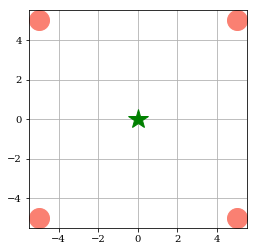

In [2]:
        
### create an ensemble of sources

# square formation:
dx=10. *1.e3 # in meters
sources=[]
sources.append(source(-dx*.5,-dx*.5))
sources.append(source(dx*.5,-dx*.5))
sources.append(source(dx*.5,dx*.5))
sources.append(source(-dx*.5,dx*.5))
#sources.append(source(0.,dx*.25))
Ns = len(sources)

### init a receiver
r=receiver(0. *1.e3, 0. *1.e3)

### plot
plt.figure()
ax=plt.subplot(111)
[s.plot() for s in sources]
r.plot()
ax.grid()
#ax.set_xlim([-1.,21.])
#ax.set_ylim([-1.,11.])
ax.set_aspect('equal')
plt.show()


In [3]:
for i, s in enumerate(sources):
    print('Distance source %d - float = %.2f km' %(i, dist(s,r)/1.e3))
    print('  horizontal offset for a sound celerity difference of %.1f m/s = %.2f m' %(10., dist(s,r)*10./1500.))

Distance source 0 - float = 7.07 km
  horizontal offset for a sound celerity difference of 10.0 m/s = 47.14 m
Distance source 1 - float = 7.07 km
  horizontal offset for a sound celerity difference of 10.0 m/s = 47.14 m
Distance source 2 - float = 7.07 km
  horizontal offset for a sound celerity difference of 10.0 m/s = 47.14 m
Distance source 3 - float = 7.07 km
  horizontal offset for a sound celerity difference of 10.0 m/s = 47.14 m


---

## Demo case



In [4]:
#[s.draw_celerity(10.) for s in sources]
#[s.draw_dxdy(10.) for s in sources]
r.draw_clock_drift(1.)

The true underwater float position and clock offset are:

In [5]:
print('x = %.1f m \ny = %.1f m \ndt = %.1e s' %(r.x, r.y, r.dt))

x = 0.0 m 
y = 0.0 m 
dt = -2.3e-01 s


We solve the geolocation problem with the a priori uncertainties and estimates :

In [6]:
# a priori uncertainties : 
print("e_c  = %.1f m/s  (celerity)" %s.e_c)
print("e_dt = %.1f s  (clock drift)" %r.e_dt)
print("e_x  = %.1f m  (underwater float position)" %r.e_x)
print("e_dx = %.1f m  (dx between transducer and surface float)" %s.e_dx)

e_c  = 10.0 m/s  (celerity)
e_dt = 1.0 s  (clock drift)
e_x  = 10000.0 m  (underwater float position)
e_dx = 10.0 m  (dx between transducer and surface float)


In [7]:
# a priori estimates :
x0 = np.zeros((3+3*Ns))
# a priori position :
x0[0] = 1.e3
x0[1] = 0.e3 

In [8]:
x_hat, y_hat, dt_hat, dx_hat, dy_hat, success, message, res = geolocalize(r, sources,x0 = x0, disp=True)

Optimization terminated successfully.
         Current function value: 0.559040
         Iterations: 51
         Function evaluations: 58
         Gradient evaluations: 58


In [9]:
#
print("Optimizer exited successfully :", success)
print("Cause of the termination :", message)
#
x, y, dt, dx, dy, dc = r.x, r.y, r.dt, [s.dx for s in sources], \
                       [s.dy for s in sources] , [s.c - s.c_b for s in sources]
print ("True values :")
print('x = %.1fm    y = %.1fm    dt = %.1es' %(x, y, dt))
print('dx = ',np.array(dx)[:,0])
print('dy = ',np.array(dy)[:,0])
print ("\nEstimated values :")
print('x_hat=%.1fm    y_hat = %.1fm    dt_hat = %.1es' %(x_hat, y_hat, dt_hat))
print('dx_hat = ',np.array(dx_hat))
print('dy_hat = ',np.array(dy_hat))

Optimizer exited successfully : True
Cause of the termination : Optimization terminated successfully.
True values :
x = 0.0m    y = 0.0m    dt = -2.3e-01s
dx =  [-17.8457009   -8.50976286  -1.77141284  11.60570257]
dy =  [ 0.36270244 -9.43638917 -0.0725755   3.10749825]

Estimated values :
x_hat=44.1m    y_hat = -21.3m    dt_hat = -2.1e-01s
dx_hat =  [0.00095589 0.00095589 0.00095589 0.00095589]
dy_hat =  [2.1235426e-05 2.1235426e-05 2.1235426e-05 2.1235426e-05]


In [10]:
res

      fun: 0.5590395690733833
 hess_inv: array([[ 2.44298965e+03, -4.97504266e-01, -1.54855278e-02,
         2.86577579e+01, -9.38081667e+00,  2.86577579e+01,
        -9.38081667e+00,  2.86577579e+01, -9.38081667e+00,
         2.86577580e+01, -9.38081667e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-4.97504266e-01,  2.25322723e+03,  5.86238008e-03,
         6.55821251e-01,  4.48110309e+01,  6.55821268e-01,
         4.48110309e+01,  6.55821275e-01,  4.48110309e+01,
         6.55820945e-01,  4.48110309e+01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.54855278e-02,  5.86238008e-03,  5.16459438e-04,
        -3.42022355e-03,  2.31848148e-03, -3.42022354e-03,
         2.31848148e-03, -3.42022354e-03,  2.31848148e-03,
        -3.42022356e-03,  2.31848148e-03,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.86577579e+01,  6.55821251e-01, -3.42022355e-03,
         1.1